In [1]:
%pylab inline
from sigvisa import Sigvisa
import seaborn as sns



Populating the interactive namespace from numpy and matplotlib


In [2]:
s = Sigvisa()
cursor = s.dbconn.cursor()

sql_query = "select depth from leb_origin"
cursor.execute(sql_query)
depths = cursor.fetchall()
cursor.close()

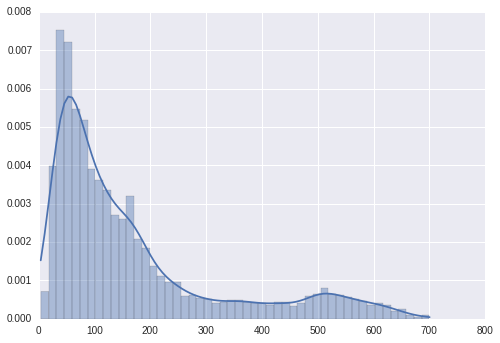

In [3]:
depths = np.array(depths, dtype=np.float)
rdepths = depths[depths > 0]

sns.distplot(rdepths)

In [22]:
len(rdepths)/float(len(depths))
import scipy.stats
r = scipy.stats.gamma.fit(rdepths)
print r

(1.4180104807576401, 6.2720945292316372, 126.71441584169227)


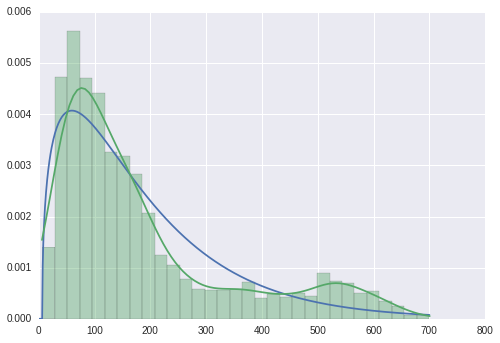

In [23]:

rv = scipy.stats.gamma(r[0], loc=r[1], scale=r[2])
xs = np.linspace(0, 700, 700)
ps = rv.pdf(xs)
plot(xs, ps)
sns.distplot(rdepths)

In [24]:
print ps[:10]

[ 0.          0.          0.          0.          0.          0.          0.
  0.00102997  0.00146234  0.00175456]


In [6]:
rv2 = scipy.stats.expon(loc=0, scale=5)
ps2 = rv2.pdf(xs)
plot(xs, .7*ps2+.3*ps)
sns.distplot(depths)
plt.ylim(0, 0.02)


NameError: name 'scipy' is not defined

(0, 700)

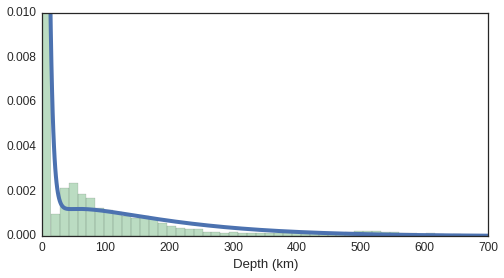

In [30]:
def depth_lp(d):

    # log(5) = 1.609437
    #p1 = -1.609437 - d/5.0
    p1 = np.exp(-d/5.0)/5.0
    
    scale = 126.7144
    x = (d-6.27209)/scale
    # gamma(1.41801048) = 0.88642998
    # log(0.88642998) = -0.1205531
    p2 = x**0.41801048 * np.exp(-x) / 0.88642998
    p2 /= scale
    #p2 = (0.41801048)*log(x) - x + 0.1205531
    p = .7*p1 + .3*p2
    
    return np.log(p)

plt.figure(figsize=(8, 4))
xs = np.linspace(0, 700, 700)
ps3 = [depth_lp(d) for d in xs]
plot(xs, np.exp(ps3), lw=4)
#plot(xs, .7*ps2+.3*ps)

sns.set_style("white")
sns.set_context("paper", font_scale=1.5)
sns.distplot(depths, kde=False, norm_hist=True)
plt.ylim(0.00, 0.01)
plt.xlabel("Depth (km)")
plt.xlim(0, 700)

In [33]:
np.log(5)

1.6094379124341003

In [35]:
np.log(scipy.special.gamma(1.41801048))

-0.12055313324629476